Problem statement - The objective of this project is build a machine learning model that can predict sentiment is positive or negative based on mobile owners review

# Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
review = pd.read_csv('C:\\Users\\abc\\Downloads\\Dataset\\archive (2)\\APPLE_iPhone_SE.csv')
review.head()

,Ratings,Comment,Reviews
0,5,Super!,Great camera for pics and videos Battery life ...
1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...
2,5,Great product,"Who all loves older size i.e., 4.7 inch type s..."
3,5,Simply awesome,This iPhone SE is the best phone ever you get....
4,5,Classy product,This is my second iphone after iphone 4s. I’ve...


In [3]:
review.Ratings.unique()

array([5, 4, 3, 1, 2], dtype=int64)

Ratings are from 1 to 5 so here we consider 3 is the neutral rating

and Rating above 3 is Positive and less than 3 is negative rating

In [4]:
review = review[review['Ratings']!=3]   #here we consider rating=3 is neurtral rating
review['Positively Rated']=np.where(review['Ratings']>3, 1, 0)

In [5]:
review.reset_index(inplace=True)
review.head(10)

,index,Ratings,Comment,Reviews,Positively Rated
0,0,5,Super!,Great camera for pics and videos Battery life ...,1
1,1,5,Must buy!,Great device. Let me tell the Pros..1. Superb ...,1
2,2,5,Great product,"Who all loves older size i.e., 4.7 inch type s...",1
3,3,5,Simply awesome,This iPhone SE is the best phone ever you get....,1
4,4,5,Classy product,This is my second iphone after iphone 4s. I’ve...,1
5,5,4,Love at First Home Touch,Totally worth the price if:- you are a iOS fan...,1
6,6,4,Wonderful,Mobile is very handy. Packed with good perform...,1
7,7,4,Worth the money,As always compact and handy ... with good imag...,1
8,8,4,Very Good,If you are going to use apple for first time t...,1
9,10,5,Brilliant,People talk about it’s battery backup?? man I’...,1


In [6]:
review['Positively Rated'].value_counts().plot

In [7]:
review['Positively Rated'].mean()    #So this is highly imbalanced

0.9266724776639791

In [8]:
review.shape

(9178, 5)

In [9]:
len(review)

9178

# Data cleaning and preprocessing

In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet =  WordNetLemmatizer()

In [11]:
corpus = []
for i in range(len(review)):
    rew = re.sub('[^a-zA-Z]',' ',review['Reviews'][i])     #removing terms other than a-zA-Z
    rew = rew.lower()                                      #converting all data in lowercase
    rew = rew.split()      
    rew = [wordnet.lemmatize(word) for word in rew if word not in stopwords.words('english')]     #lemmatizatin
    rew = ' '.join(rew)
    corpus.append(rew)    

# Bag of words

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
ctv = CountVectorizer(max_features=5000,ngram_range=(1,3))

In [13]:
X=ctv.fit_transform(corpus).toarray()
X.shape

(9178, 5000)

# Handling Imbalanced dataset

In [14]:
from imblearn.combine import SMOTETomek
st = SMOTETomek()
X_res,y_res=st.fit_resample(X,review['Positively Rated'])

In [15]:
X_res.shape

(16994, 5000)

In [16]:
y_res.shape

(16994,)

In [17]:
words=''
for i in corpus:
    for j in i.split(' '):
        words+=j+' ' 

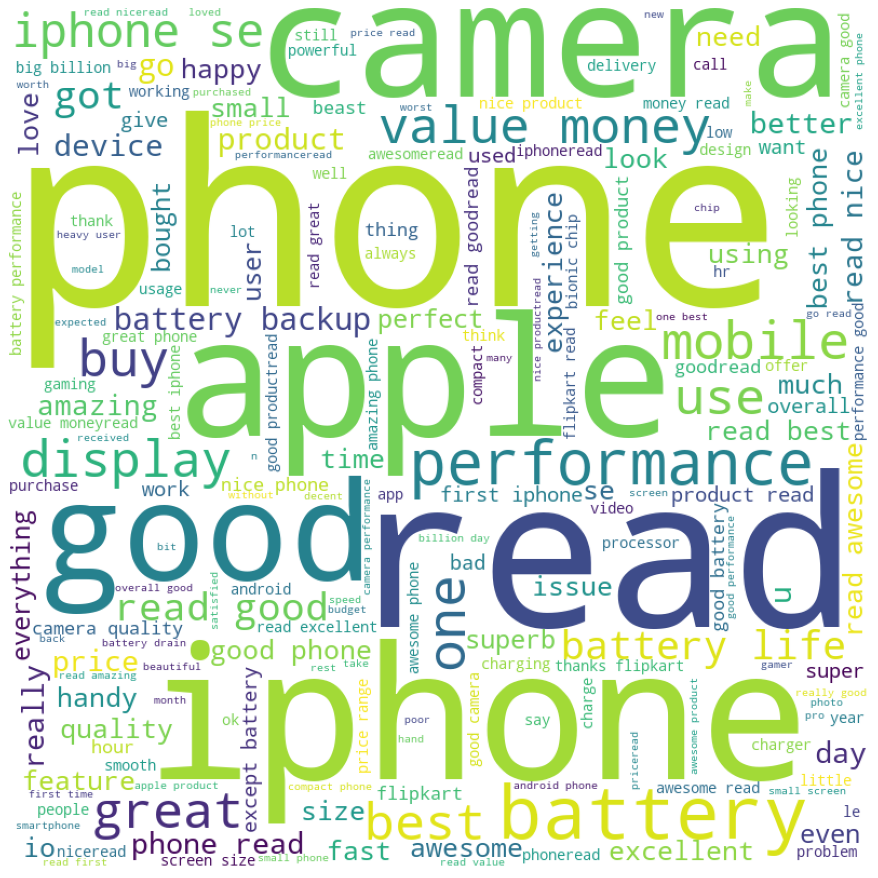

In [18]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=800,background_color ='white',
                min_font_size = 10).generate(words)

plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

These are the most important and frequent words

In [19]:
#Creating Dictonary where key is word and value is number of occurance of that word
frequency_words = dict()
for i in words.split(' '):
    c=0
    for j in words.split(' '):
        if i == j:
            c+=1
    if c>=500:        # word which comes more than 500 times
        frequency_words[i]=c        

In [20]:
frequency_words # word which comes more than 500 times

{'great': 782,
 'camera': 1237,
 'battery': 2557,
 'good': 2419,
 'use': 512,
 'day': 708,
 'phone': 3527,
 'read': 3969,
 'best': 1196,
 'price': 655,
 'iphone': 1749,
 'se': 546,
 'performance': 1140,
 'one': 650,
 'nice': 757,
 'apple': 886,
 'awesome': 872,
 'small': 618,
 'flipkart': 595,
 'product': 1188,
 'value': 527}

In [21]:
w = []
count=[]
for key,value in frequency_words.items():
    w.append(key)
    count.append(value)

Text(0, 0.5, 'Words')

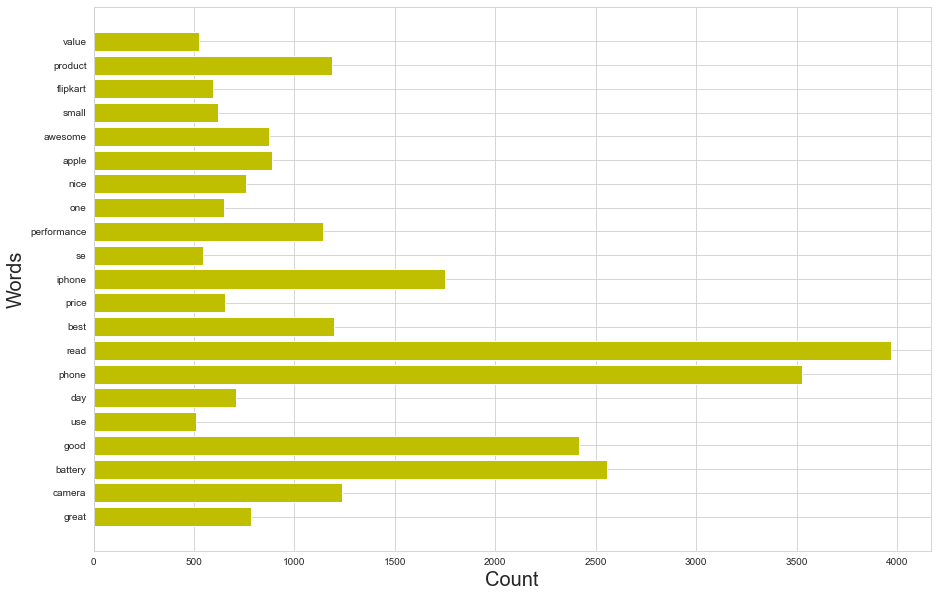

In [40]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
plt.barh(w,count,color='y')
plt.xlabel('Count',fontsize=20)
plt.ylabel('Words',fontsize=20)

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=0)

# Model Building

# 1. Naive bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

In [25]:
clf.fit(X_train,y_train)

MultinomialNB()

In [26]:
pred=clf.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score
print(confusion_matrix(y_test,pred))
print(precision_score(y_test,pred))

[[1634   54]
 [ 121 1590]]
0.9671532846715328


In [28]:
clf.score(X_test,y_test)

0.941747572815534

In [29]:
clf.score(X_train,y_train)

0.9528503126149319

# 2. Random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier()

In [31]:
ran.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
ran.score(X_test,y_test)

0.9485142689026184

In [33]:
pred=ran.predict(X_test)

In [42]:
cd=confusion_matrix(y_test,pred)
print(cd)
print(precision_score(y_test,pred))

[[1634   54]
 [ 121 1590]]
0.9671532846715328


In [35]:
import seaborn as sns

<AxesSubplot:>

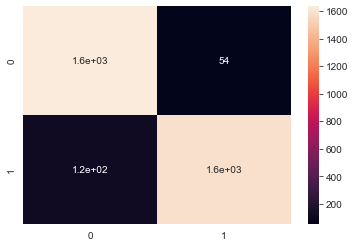

In [36]:
sns.heatmap(cd,annot=True)

# Important 20 Features

In [37]:
#Most important 20 words
feature_names = ctv.get_feature_names()
sorted(zip(ran.feature_importances_, feature_names),reverse=True)[:20]

[(0.04476489624153868, 'goodread'),
 (0.043939223237395936, 'good'),
 (0.033119287848076134, 'best'),
 (0.02852847698692981, 'nice'),
 (0.025298990629666552, 'awesome'),
 (0.021630211619645873, 'niceread'),
 (0.020183815498299684, 'battery'),
 (0.01849357910659326, 'awesomeread'),
 (0.017508128543192735, 'great'),
 (0.016468100414901453, 'camera'),
 (0.014927591707035366, 'excellent'),
 (0.013946082381768093, 'productread'),
 (0.01193599172490326, 'amazing'),
 (0.011631434006244518, 'excellentread'),
 (0.011371431481376952, 'love'),
 (0.011311745770240461, 'performance'),
 (0.011134495270446654, 'phone'),
 (0.00975072573807272, 'read'),
 (0.009368299168480478, 'phoneread'),
 (0.00849512437791961, 'value')]

<AxesSubplot:>

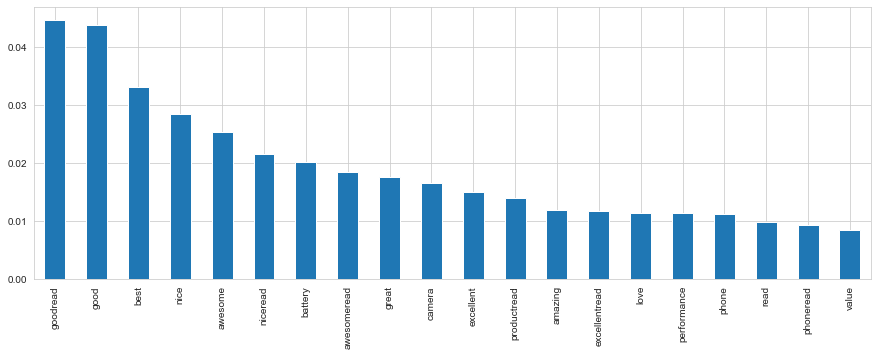

In [38]:
import matplotlib.pyplot as plt
feature_names = ctv.get_feature_names()
plt.figure(figsize=(15,5))
feat_importances = pd.Series(ran.feature_importances_, index=feature_names)
feat_importances.nlargest(20).plot(kind='bar')

array(<1x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>, dtype=object)

In [47]:
a=str('camera quality is good')
ran.predict(ctv.transform([a]))


array([1])

Conclusion : Out of these two models Randomforest gives best accuracy 95%

In [45]:
import pickle
pickle.dump(ctv,open('vectorizer.pkl','wb'))
pickle.dump(ran,open('model.pkl','wb'))